# Health Expectancy

In [1]:
from scipy.stats import pearsonr, ttest_1samp
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")

In [2]:
df = sns.load_dataset("healthexp")
df.head()

,Year,Country,Spending_USD,Life_Expectancy
0,1970,Germany,252.311,70.6
1,1970,France,192.143,72.2
2,1970,Great Britain,123.993,71.9
3,1970,Japan,150.437,72.0
4,1970,USA,326.961,70.9


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             274 non-null    int64  
 1   Country          274 non-null    object 
 2   Spending_USD     274 non-null    float64
 3   Life_Expectancy  274 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 8.7+ KB


#### **0. Variables discrètes et continues du dataset**

In [4]:
disc = ["Year", "Country"]
cont = ["Spending_USD", "Life_Expectancy"]

#### **1. `Spending_USD` et `Life_Expectancy` semblent être corrélées**

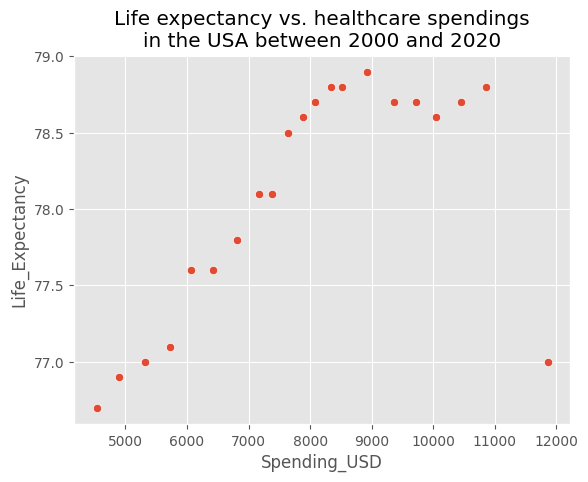

In [5]:
tmp_df_1 = df.query("`Year` >= 2000 & `Country` == 'USA'")
sns.scatterplot(data=tmp_df_1, x="Spending_USD", y="Life_Expectancy")
plt.title("Life expectancy vs. healthcare spendings\nin the USA between 2000 and 2020")
plt.show()

##### **1.1 Quelle est la corrélation de Pearson entre ces deux variables aux États-Unis, de 2000 à 2020 ?**

In [6]:
pearsonr(tmp_df_1["Spending_USD"], tmp_df_1["Life_Expectancy"])

PearsonRResult(statistic=np.float64(0.6210674528998252), pvalue=np.float64(0.0026581544805799064))

- `Spending_USD` et `Life_Expectancy` étant continues, nous utilison le test de corrélation Pearson.
- Le coefficient obtenu est environ égal à 0,62.

##### **1.2 Quelle serait la probabilité d'obtenir une corrélation au moins aussi importante que celle-ci, si en réalité les deux variables n'étaient pas corrélées ?**

- Posons H0 : "Les variables `Spending_USD` et `Life_Expectancy` ne sont pas correlées".
- Alors la probabilité d'obtenir une correlation ≥ 0,621 (ou "assez négative" car test bilatéral) sachant H0 est : p = 0,0027 (la p-valeur du test).
- Autrement dit, si les variables ne sont pas correlées, les chances d'obtenir une correlation ≥ 0,621 sont infimes (de l'ordre de 0,27%).
- En calculant 1/p, on obtient 376. On conclut que si les variables ne sont pas correlées en réalité, alors on a 1 chance sur 376 d'obtenir le résultat actuel.

#### **2. Il semblait également que l'Allemagne et la Grande-Bretagne avaient la même durée de vie moyenne de 1970 à 2020. Peut-on tester cela ?**

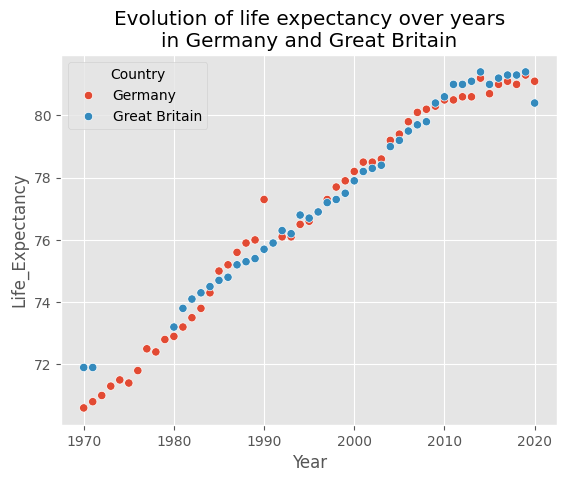

In [7]:
tmp_df_2 = df.query("Country in ['Germany', 'Great Britain']")
sns.scatterplot(data=tmp_df_2, x="Year", y="Life_Expectancy", hue="Country")
plt.title("Evolution of life expectancy over years\nin Germany and Great Britain")
plt.show()

- C'était une question piège (et je me suis fait prendre haha😆) !
- On relève une ambiguité sur la question posée :
  - S'agit-il de la moyenne des durées de vie en Allemagne et en Grande-Bretagne sur toute la période allant de 1970 à 2000 ?
    - Si oui, nous pourrions penser au test de Student à 2 échantillons indépendants.
    - Sauf que les observations au sein des groupes ne sont pas indépendantes les unes des autres.
    - L'espérance de vie en Allemagne en 2001 dépend forcément de l'espérance de vie dans le même pays en 2000 car la population est relativement la même.
  - S'agit-il alors de vérifier si à travers le temps ces 2 pays avaient en moyenne la même durée de vie ?
    - Autrement dit, est-ce que les 2 séries temporelles se "superposent" bien ?
    - Nous n'avons pas encore étudié les outils appropriés pour ce genre de cas (DTW, ARIMA, etc.).

#### **3. Un politicien américain affirme que depuis 1970, la durée de vie aux États-Unis augmente en moyenne de 0,3 an chaque année. Testons cette affirmation et donnons notre conclusion avec un niveau de confiance de 98%.**

- H0 : "La moyenne des évolutions annuelles de l'espérance de vie aux États-Unis est de 0,3 an".
- La variable étant continue et unique, nous allons utiliser un test de Student à 1 échantillon après avoir vérifié les 2 conditions :
  - Données indépendantes les unes des autres.
  - Données issues d'une distributions normale ou alors +30 points.

In [8]:
# Observations
tmp_df_3 = df.query("Country == 'USA'").copy()
tmp_df_3["Life_Expectancy_Diff"] = tmp_df_3["Life_Expectancy"].diff()
tmp_df_3.dropna(inplace=True)

print("Observations:", tmp_df_3["Life_Expectancy_Diff"].values)
print("Statistics:", tmp_df_3["Life_Expectancy_Diff"].describe())

Observations: [ 0.3  0.   0.2  0.6  0.7  0.2  0.4  0.2  0.4 -0.2  0.4  0.4  0.1  0.1
  0.   0.   0.2  0.   0.2  0.2  0.2  0.2 -0.2  0.2  0.   0.4  0.4  0.2
  0.   0.   0.2  0.1  0.1  0.5  0.   0.2  0.3  0.   0.4  0.1  0.1  0.1
  0.   0.1 -0.2  0.  -0.1  0.1  0.1 -1.8]
Statistics: count    50.000000
mean      0.122000
std       0.338237
min      -1.800000
25%       0.000000
50%       0.100000
75%       0.200000
max       0.700000
Name: Life_Expectancy_Diff, dtype: float64


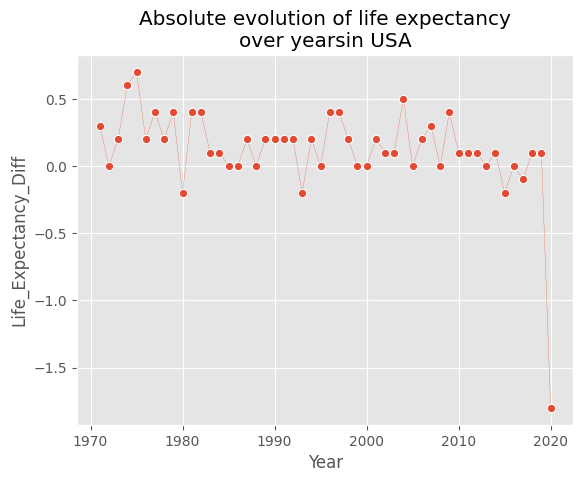

In [9]:
sns.lineplot(
    data=tmp_df_3, x="Year", y="Life_Expectancy_Diff", marker="o", linewidth=0.2
)
plt.title("Absolute evolution of life expectancy\nover yearsin USA")
plt.show()

In [10]:
ttest_1samp(tmp_df_3["Life_Expectancy_Diff"], popmean=0.3)

TtestResult(statistic=np.float64(-3.7212105613188773), pvalue=np.float64(0.0005112013249193949), df=np.int64(49))

- L'écart entre la moyenne observée et celle donnée par le politicien est d'environ 0.178 ans.
- La probabilité p = 0,000511 d'obtenir un écart au moins aussi important entre ces deux moyennes étant donné H0 est très faible.
- On a en effet 1 chance sur 1956 d'obtenir de tels résultats ou pire si ce politicien a raison.
- La p-valeur de notre test est inférieure à notre seuil de 0,02.
- Nous rejettons donc l'hypothèse proposée.

---

#### **Analyse fondamentale**

Le dataset recoupe les données relatives à l'espérance de vie et aux dépenses en matière de santé entre 1070 et 2020 dans les 6 pays suivants : les USA, le Canada, la France, l'Allemagne, la Grande-Bretagne et le Japon.

Les variables du dataset sont :
- `Year` : L'année à laquelle renvoient les données.
- `Country` : Le pays pour lequel les données ont été relevées.
- `Spending_USD` : La dépense annuelle de santé par personne en dollars américains. Cette dépense tient compte des dépenses de l'Etat (couverture santé universelle), des frais d'assurance santé (obligatoire ou volontaire), et des dons provenant des ONGs et autres organismes privés. Elle est exprimée en dollars internationaux\* aux prix de 2015.
- `Life_Expectancy` : L'estimation de l'espérance de vie des habitants à la naissance. Il s'agit de la durée de vie moyenne, i.e. l'âge moyen du décès d'une génération fictive qui serait soumise à chaque âge aux conditions de mortalité de l'année considérée.

Ces données proviennent de nombreuses sources produites par différents organismes internationaux, universités et fondations (GapMinder, OWID) :
- [Our World in Data](https://ourworldindata.org/grapher/life-expectancy-vs-health-expenditure) (OWID, source principale)
- [UN, World Population Prospects (2024)](https://population.un.org/wpp/Download/)
- [OECD Health Expenditure and Financing Database (2023)](https://data-explorer.oecd.org/)
- [HYDE (2023)](https://doi.org/10.24416/UU01-AEZZIT) (History Database of the Global Environment, Utrecht University)
- [Gapminder - Population v7 (2022)](http://gapm.io/dpop)
- [Gapminder - Systema Globalis (2022)](https://github.com/open-numbers/ddf--gapminder--systema_globalis)

Ces données sont collectées, aggrégées et mises à jour depuis de nombreuses années au niveau national au moyen d'enquêtes et de vérifications réalisées suivant des protocoles reconnus et approuvés à l'échelle internationale.

\*Le dollar international est une monnaie hypothétique permettant de comparer raisonnablement les indicateurs économiques entre les différents pays. Elle tient compte des taux d'inflation, aini que des différences en termes de niveau de vie afin de maintenir un povoir d'achat fixe dans le temps et dans tous les pays considérés.